# Filtering in Image Processing

Today, we will look at a concept I found very interesting, the concept of convolution. Convolution is a filtering operation, specifically, a convolution is a linear, shift-invariant system. In case you are wondering what all this means, don't worry, we will look at all of it and I hope you will see what I found so interesting with this concept and be interested in it too! But first things first!

# What is filtering in image processing

Filtering is a technique for modifying images. Think of a normal filter, what it does. For example, it could block solid particles from passing through and allow a liquid to pass through, if we are filtering a liquid. In the same way a filter in image processing is used to remove features that are unwanted and enhance features that we want. Through filtering, we can:
* Enhance images - sharpen(accentuate edges)
* Smooth images
* Remove noise

Filtering is a neighborhood operation. This means that the value of the pixel at any point is found by applying some algorithm to the values of the pixels in the neighborhood of the corresponding input pixel{[1](https://www.mathworks.com/help/images/what-is-image-filtering-in-the-spatial-domain.html)}.

## Images as functions

In order to understand what we mean by filtering as a neighborhood operation, it helps to think of images not just as pixel values but as a function. Consider a gray image. It can be represented as a 2D matrix. It can also be represented as a function `f(x, y)` where x and y are the width and height, respectively. At any valid x and y, the value of the function is equal to the pixel intensity at that point.

We could define a function g(x, y) as f(x, y) + 20. This would essentially mean that we increase the value of every pixel by 20 points. In code, this would essentially mean iterating over every pixel and adding 20.

Filtering as a neighborhood operation works in the same way. The only difference in this case would be that G(x, y), the resultant value of the pixel P at (x, y) is set by aggregating the results from a range of values surrounding P and P itself i.e. perform an operation on every pixel f(X, Y) (where X and Y are ranges, not single values), add the results of each pixel and set the value of summation to P. We will see more of this later, so don't worry if its not immediately clear.

With this in mind, we can now go one step further.

## Linear filters

Early on in our definition, we said that a convolution is a linear filter. We have said that a filter is a neighborhood operation, that is, the final value of the pixel P is a combination of the values of an operation H done on the range of pixels f(X, Y) which are in the neighborhood of P. A linear filter simply menas that this combination of the resultant values of the neighboring pixels is a linear combination (weighted sum).

## Kernels

We cannot get to a discussion about convolution without talking about kernels. We can define a kernel as a (usually) small `N * M` region that is slid over every image. In other words, a kernel defines the size of the neighborhood in a filtering operation. The size of the kernel defines the number of pixels that weigh in on the final pixel's value. To better understand things, let us look at an example:

We will define a kernel like  so:
$$\frac{1}{9}\begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}$$

Above, we have a `3 * 3` matrix, of all ones. The matrix is multiplied by 1/9, this is called weighting. This is to ensure that the resulting pixel's value is within the range of its neighborhood (otherwise, it would be 9 times greater). The anchor of the kernel (in this case, the centre) defines how the kernel will be aligned with the underlying image. To clarify, let's apply this kernel on a `3 * 3` image. (In this case, we can only affect the central pixel, since the rest are border pixels and the kernel will be out of range for them.

The matrix is:
$$\begin{bmatrix} 36 & 131 & 251 \\ 203 & 234 & 228 \\ 79 & 29 & 153 \end{bmatrix}$$

Say we want to apply a linear filter on  the matrix above with the kernel we defined before. We will overlay the kernel on the matrix and at every point we will multiply `kernel[x, y]` with `matrix[x, y]`. We will then add the values of the individual multiplications and divide by 9 (weighting). We will then set this as the value of the central matrix element at (1, 1). The resulting array will look like so:

$$\begin{bmatrix} 36 & 131 & 251 \\ 203 & 149 & 228 \\ 79 & 29 & 153 \end{bmatrix}$$

Mathematically, a linear filter looks like:
$I'(x, y) = \sigma{k_{i, j\sigma{kernel}} k_{i, j} \dot I(x + i, y + j)}$
I ′(x, y) = Σ
i, j∈kernel
ki, j ⋅ I (x + i, y + j)

Let us try the same in Python.

In [82]:
import numpy as np

In [83]:
#creating and weighting the kernel
ones_kernel = np.ones((3, 3), np.float32)
ones_kernel = ones_kernel/np.sum(ones_kernel)
ones_kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]], dtype=float32)

In [85]:
#creating the matrix
matrix = np.array([[ 36, 131, 251],
                      [203, 234, 228],
                      [ 79,  29, 153]])

In [86]:
#We now simulate a simple filter operation, a mean filter
value = np.uint8(np.sum(im_sample * ones_kernel))
print(value)
matrix[1, 1] = value
matrix

149


array([[ 36, 131, 251],
       [203, 149, 228],
       [ 79,  29, 153]])

The filter that we have implemented above is called a mean filter. When you look at what we've done, we have simply replaced the middle pixel by the mean of the neighborhood defined by the kernel.

Suppose, we had not wieghted the value by 9, what do you think would be the value of the resultant centre pixel?

## Convolution

We will now look at the way in which linear filters are implemented. To convolve an image, we use a convolution kernel. We flip the kernel left-to-right and bottom-up and place it over the image and convolve the image with it. For example, given the kernel below:

$$\begin{bmatrix} 1 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & 0 \end{bmatrix}$$

Before we place it over the image, we rotate it 180 degrees to look like so:

$$\begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & 1 \end{bmatrix}$$

## Correlation

Correlation is similar to convolution. The only difference between the two is that in correlation, the correlation kernel is not flipped. Hence the kernel:

$$\begin{bmatrix} 1 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & 0 \end{bmatrix}$$

will be used just as it is.

For a kernel that is symmetrical, like the one that we used in the illustration of kernels, convolution and correlation are exactly the same.

# In practice

We will now see this in practice. We will use OpenCV.

## Convolution and Correlation in OpenCV

OpenCV provides us with a method for linear filtering known as `filter2D`. According to the documentation, we see that the filter operation actually calculates the correlation and not the convolution of the image. The documentation also states how to do the convolution using the method. We will define a kernel, see what it does to the image in both correlation and convolution.

### Example 1: A symmetrical Kernel

kernel = 
$$\frac{1}{9}\begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}$$

In [88]:
import cv2
import matplotlib.pyplot as plt

plt.rcParams['image.cmap'] = 'gray'

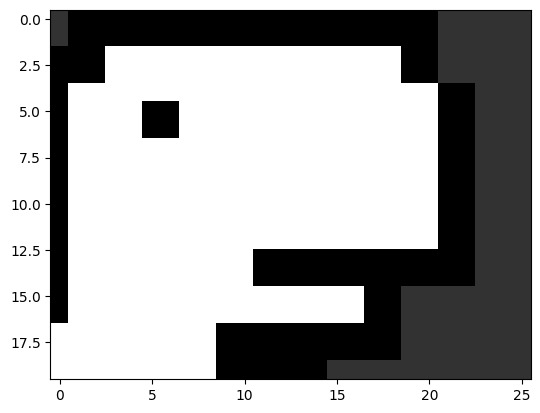

In [208]:
#load the image
dino = cv2.imread('images/dino.png', 0)
plt.imshow(dino)

In [209]:
#correlate
dino_corr = cv2.filter2D(dino, -1, ones_kernel)

We will now use the same method to calculate the convolution of the image. For this, we will use flip the kernel and set the kernel.

In [99]:
flipp_kernel = cv2.flip(ones_kernel, -1)
flipp_kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]], dtype=float32)

In [210]:
dino_conv = cv2.filter2D(dino, -1, flipp_kernel, anchor=(1, 1))

Text(0.5, 1.0, 'Convolution')

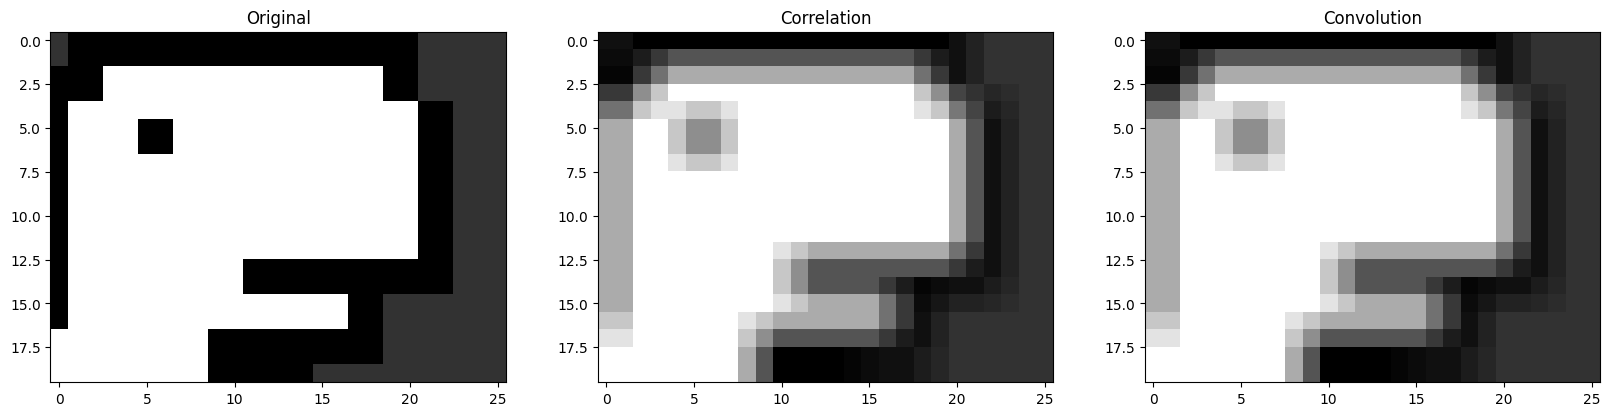

In [211]:
fig = plt.figure(figsize=[20, 5])
plt.subplot(131); plt.imshow(dino); plt.title('Original')
plt.subplot(132); plt.imshow(dino_corr); plt.title('Correlation')
plt.subplot(133); plt.imshow(dino_conv); plt.title('Convolution')

We can see that the last two images are slightly blurred. However, both these images are similar since the kernel used is symmetrical. Let's use a different kernel.

kernel = 
$$\begin{bmatrix} 1 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & 0 \end{bmatrix}$$

In [169]:
second_kernel = np.zeros((3, 3), np.uint8)
second_kernel[0, 0] = 1
second_kernel

array([[1, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [213]:
equal = cv2.imread('images/equal.png', cv2.IMREAD_COLOR)

In [214]:
#correlation
eq_corr = cv2.filter2D(equal, -1, second_kernel)

In [170]:
second_flip = cv2.flip(second_kernel, -1)
second_flip

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 1]], dtype=uint8)

In [215]:
eq_conv = cv2.filter2D(equal, -1, second_flip, anchor=(1, 1))

Text(0.5, 1.0, 'Convolution')

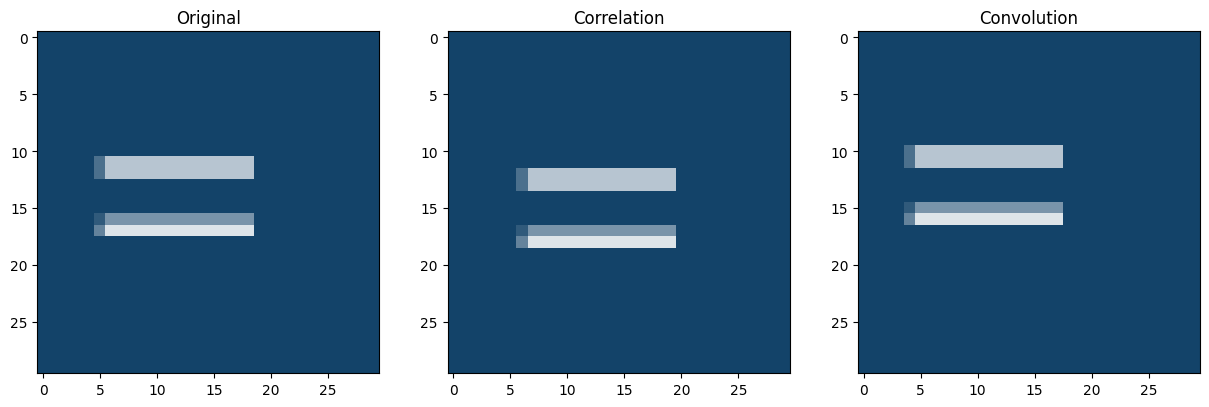

In [216]:
plt.figure(figsize=[15, 5])
plt.subplot(131); plt.imshow(equal[:, :, ::-1]); plt.title('Original')
plt.subplot(132); plt.imshow(eq_corr[:, :, ::-1]); plt.title('Correlation')
plt.subplot(133); plt.imshow(eq_conv[:, :, ::-1]); plt.title('Convolution')

We see here that there is a difference between all the results. Significantly, there is a difference between the correlation and convolution results. We see the equal sign shifted from the original position in both cases, but in different places between correlation and convolution.

### A last example

In [247]:
icon = cv2.imread('images/python.bmp', cv2.IMREAD_COLOR)

In [261]:
#gaussian kernel
kern = np.array([[0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 1]], np.float32)

kern = kern / np.sum(kern)
kern

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [262]:
icon_corr = cv2.filter2D(icon, -1, kern)

In [263]:
kern_flip = cv2.flip(kern, -1)
icon_conv = cv2.filter2D(icon, -1, kern_flip, anchor=(1, 1))
kern_flip

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)

Text(0.5, 1.0, 'Convolution')

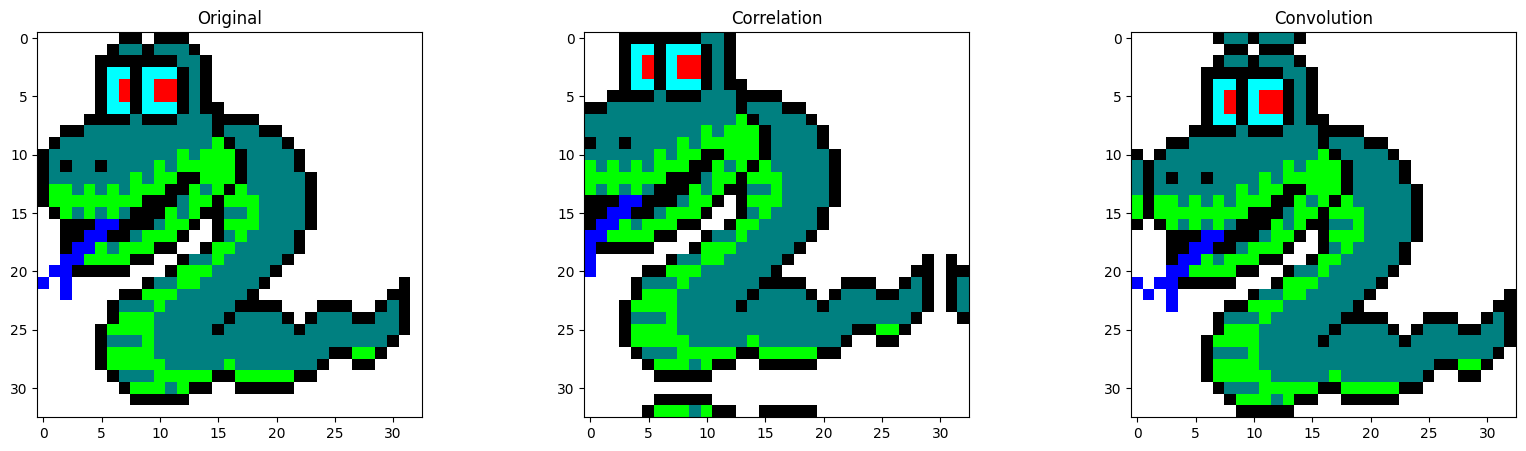

In [264]:
fig = plt.figure(figsize=[20, 5])
plt.subplot(131); plt.imshow(icon); plt.title('Original')
plt.subplot(132); plt.imshow(icon_corr); plt.title('Correlation')
plt.subplot(133); plt.imshow(icon_conv); plt.title('Convolution')

In [265]:
(icon_conv == icon_corr).all()

False

We can see that in both cases, the values have been shifted. In correlation the image is shifted up and to the left, while in convolution, the image is shifted down and to the right. Again, if the kernels were symmetric, the two results will be similar. 

Now, to the interesting part I told you about.